<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Jamboree_CaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jamboree Business Case Study**

## Objective
#### Jamboree would like to understand what factors are important in graduate admissions and how these factors influence in one's chances of getting admission. 

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, minmax_scale
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
# Load the dataset
data_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

## Statistical Summary

#### Meta-data of dataset

In [ ]:
# Basic info of the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#### Description of dataframe

In [ ]:
# Summary info of the dataset
data_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


##### **Observation:** *As the Mean and Median values of all the features are very closer, there doesn't seem to be any outliers*

In [ ]:
# Top 5 rows from the dataset
data_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Shape of the dataset

In [ ]:
# Shape of the dataset
print("Jamboree dataset contains {0} Rows and {1} Columns".format(data_df.shape[0], data_df.shape[1]))

Jamboree dataset contains 500 Rows and 9 Columns


#### Size of the dataset

In [ ]:
# total number of elements/records
data_df.size

4500

#### Column Names

In [ ]:
# Columns/Features in the dataset
data_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

#### Column data types

In [ ]:
# Data type of the attributes
data_df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

## Data Pre-Processing

#### Check for Missing Values

In [ ]:
# Check for any missing values

def check_for_missingvalues():
  output = data_df.columns[data_df.isna().any()]

  if output.size > 0: 
    print("In the given dataset {0} has missing values \n".format(output[0]))
  else:
    print("This dataset doesn't have any missing values \n")

  print(data_df.isna().sum())

check_for_missingvalues()

This dataset doesn't have any missing values 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


##### **Observation:** *There is no missing value for any of the feature*

#### Check for duplicates

In [ ]:
# Check for any duplicates
duplicate_rows = data_df[data_df.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  0


##### **Observation:** *There is no duplicate value for any of the feature*

#### Drop irrelevant columns

In [ ]:
# Drop Serial No. column
data_df.drop(['Serial No.'], axis=1, inplace=True)

#### Dataset Copy

In [ ]:
# take ca copy of the dataset for further working
work_df = data_df.copy()

In [ ]:
work_df.shape

(500, 8)

In [ ]:
# Segregating Numerical Featrues for future analysis
num_features = work_df.select_dtypes('number')
num_features.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

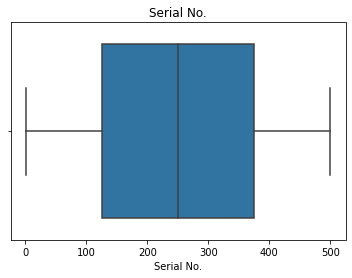

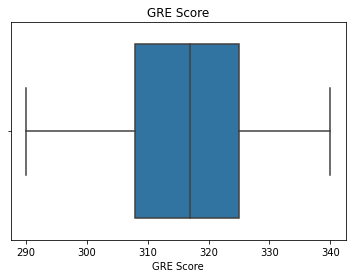

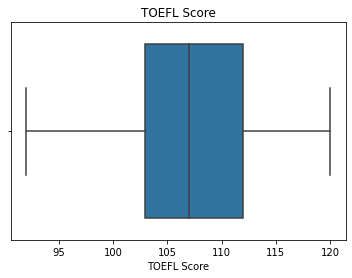

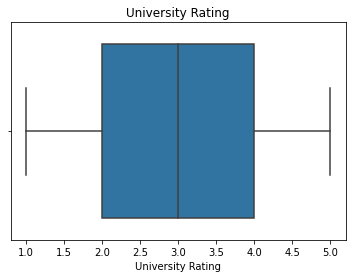

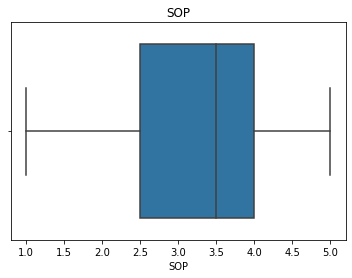

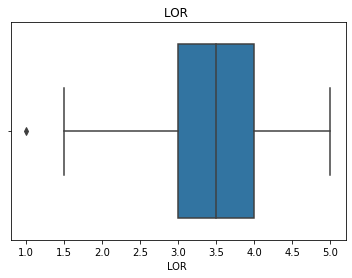

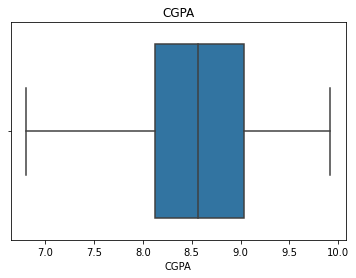

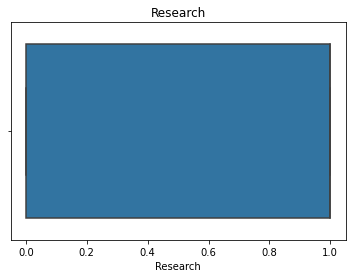

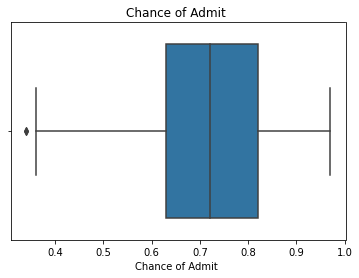

In [ ]:
# Check for outliers
for col in work_df.columns:
  p = sns.boxplot(data=work_df, x=col)
  p.set(title=f'{col}')
  plt.show()

#### Outliers Treatment

In [ ]:
# Calculate IQR for LOR
LOR_Q1 = work_df['LOR '].quantile(.25)
LOR_Q3 = work_df['LOR '].quantile(.75)
LOR_IQR = LOR_Q3 - LOR_Q1
LOR_IQR

1.0

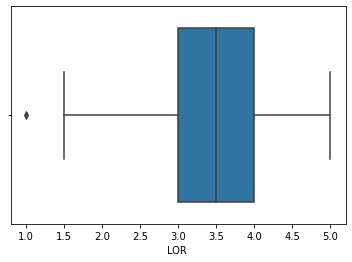

In [ ]:
# Boxplot of LOR before removing the Outlier
sns.boxplot(data=work_df, x=work_df['LOR '])

In [ ]:
# Removing outlier of LOR using IQR method
work_df = work_df[(work_df['LOR '] > LOR_Q1-1.5*LOR_IQR) & (work_df['LOR '] < LOR_Q3+1.5*LOR_IQR)]

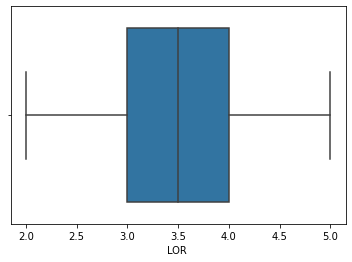

In [ ]:
# Boxplot of LOR after removing the Outlier
sns.boxplot(data=work_df, x=work_df['LOR '])

In [ ]:
# Calculate IQR for Chance of Admit
CoA_Q1 = work_df['Chance of Admit '].quantile(.25)
CoA_Q3 = work_df['Chance of Admit '].quantile(.75)
CoA_IQR = CoA_Q3 - CoA_Q1
CoA_IQR

0.18999999999999995

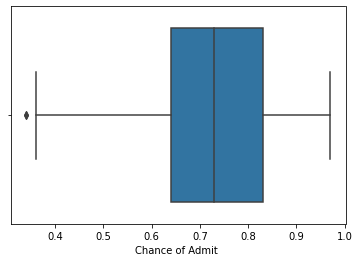

In [ ]:
# Boxplot of Chance of Admit before removing the Outlier
sns.boxplot(data=work_df, x=work_df['Chance of Admit '])

In [ ]:
# Removing outlier of Chance of Admit using IQR method
work_df = work_df[(work_df['Chance of Admit ']>CoA_Q1-1.5*CoA_IQR) & (work_df['Chance of Admit ']<CoA_Q3+1.5*CoA_IQR)]

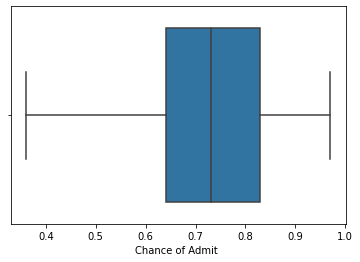

In [ ]:
# Boxplot of Chance of Admit after removing the outlier
sns.boxplot(data=work_df, x=work_df['Chance of Admit '])

## Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

#### Unique Value Counts

In [ ]:
# Unique values count of each Feature
work_df.nunique()

GRE Score             49
TOEFL Score           28
University Rating      5
SOP                    9
LOR                    7
CGPA                 182
Research               2
Chance of Admit       58
dtype: int64

In [ ]:
# Value Counts of certain features
for col in work_df.columns:
  if len(work_df[col].unique()) < 10:
    print(f"{col} column has following Unique values: ")
    print(work_df[col].unique())
    print()

University Rating column has following Unique values: 
[4 3 2 5 1]

SOP column has following Unique values: 
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]

LOR  column has following Unique values: 
[4.5 3.5 2.5 3.  4.  2.  5. ]

Research column has following Unique values: 
[1 0]



In [ ]:
# GRE Score vs Chances of getting admission
work_df.groupby(by='Chance of Admit ')['GRE Score'].describe().sort_values(by='Chance of Admit ', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Chance of Admit,,,,,,,,
0.97,4.0,337.500000,3.000000,334.0,335.50,338.0,340.00,340.0
0.96,8.0,337.375000,2.559994,333.0,335.75,338.0,339.25,340.0
0.95,5.0,336.200000,2.863564,333.0,334.00,336.0,338.00,340.0
0.94,13.0,334.230769,3.854734,328.0,332.00,334.0,336.00,340.0
0.93,12.0,330.583333,3.987670,321.0,329.50,331.0,334.00,335.0
0.92,9.0,328.555556,6.385748,320.0,323.00,331.0,333.00,337.0
0.91,10.0,330.500000,5.759051,322.0,326.50,330.0,336.00,338.0
0.90,9.0,330.555556,4.362084,324.0,329.00,330.0,332.00,340.0
0.89,11.0,328.636364,5.045250,323.0,324.00,329.0,331.00,339.0


##### **Observation:** *To ensure the chance of getting an admission the minimum GRE score seem to be 320*

In [ ]:
# CGPA Score vs Chances of getting admission
work_df.groupby(by='Chance of Admit ')['CGPA'].describe().sort_values(by='Chance of Admit ', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Chance of Admit,,,,,,,,
0.97,4.0,9.875000,0.054467,9.80,9.8525,9.890,9.9125,9.92
0.96,8.0,9.753750,0.110446,9.50,9.7550,9.770,9.8050,9.87
0.95,5.0,9.540000,0.269815,9.06,9.6200,9.660,9.6600,9.70
0.94,13.0,9.533077,0.127697,9.28,9.4700,9.530,9.6000,9.80
0.93,12.0,9.477500,0.132331,9.26,9.3750,9.445,9.5700,9.68
0.92,9.0,9.417778,0.217243,9.19,9.2500,9.360,9.4400,9.86
0.91,10.0,9.328000,0.127262,9.08,9.2375,9.355,9.4375,9.46
0.90,9.0,9.324444,0.145869,9.16,9.2400,9.340,9.3600,9.60
0.89,11.0,9.270909,0.182563,9.07,9.1650,9.230,9.3200,9.70


##### **Observation:** *A CGPA of 9 or more has advantage of getting an admission*

In [ ]:
# TOEFL Score vs Chances of getting admission
work_df.groupby(by='Chance of Admit ')['TOEFL Score'].describe().sort_values(by='Chance of Admit ', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Chance of Admit,,,,,,,,
0.97,4.0,119.750000,0.500000,119.0,119.75,120.0,120.00,120.0
0.96,8.0,116.000000,2.828427,112.0,113.75,116.5,117.50,120.0
0.95,5.0,118.000000,2.000000,115.0,117.00,119.0,119.00,120.0
0.94,13.0,116.692308,2.496151,112.0,116.00,117.0,118.00,120.0
0.93,12.0,115.916667,2.234373,111.0,115.00,116.0,116.50,120.0
0.92,9.0,114.888889,3.018462,110.0,113.00,115.0,118.00,118.0
0.91,10.0,115.000000,1.943651,112.0,113.25,115.5,116.00,118.0
0.90,9.0,116.111111,2.848001,111.0,114.00,116.0,119.00,119.0
0.89,11.0,113.545455,2.504541,110.0,113.00,113.0,113.50,119.0


##### **Observation:** *To ensure the chance of getting an admission the minimum TOEFL score seem to be 110*

In [ ]:
# TOEFL Score vs Chances of getting admission
work_df.groupby(by='Chance of Admit ')['SOP'].describe().sort_values(by='Chance of Admit ', ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
Chance of Admit,,,,,,,,
0.97,4.0,4.250000,0.288675,4.0,4.000,4.25,4.500,4.5
0.96,8.0,4.750000,0.462910,4.0,4.750,5.00,5.000,5.0
0.95,5.0,4.900000,0.223607,4.5,5.000,5.00,5.000,5.0
0.94,13.0,4.692308,0.325222,4.0,4.500,4.50,5.000,5.0
0.93,12.0,4.583333,0.417424,4.0,4.375,4.50,5.000,5.0
0.92,9.0,4.388889,0.416667,4.0,4.000,4.50,4.500,5.0
0.91,10.0,4.250000,0.634648,3.0,4.000,4.50,4.500,5.0
0.90,9.0,4.500000,0.353553,4.0,4.500,4.50,4.500,5.0
0.89,11.0,4.318182,0.462208,3.5,4.000,4.50,4.500,5.0


##### **Observation:** *SOP value doesn't seem to have an impact on chances of gettting admission*

In [ ]:
# TOEFL Score vs Chances of getting admission
work_df.groupby(by='Chance of Admit ')['LOR '].describe().sort_values(by='Chance of Admit ', ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
Chance of Admit,,,,,,,,
0.97,4.0,4.250000,0.645497,3.5,3.875,4.25,4.625,5.0
0.96,8.0,4.687500,0.530330,3.5,4.500,5.00,5.000,5.0
0.95,5.0,4.400000,0.418330,4.0,4.000,4.50,4.500,5.0
0.94,13.0,4.846154,0.240192,4.5,4.500,5.00,5.000,5.0
0.93,12.0,4.250000,0.657129,3.5,3.500,4.25,5.000,5.0
0.92,9.0,4.500000,0.500000,3.5,4.500,4.50,5.000,5.0
0.91,10.0,4.450000,0.497214,3.5,4.125,4.50,4.875,5.0
0.90,9.0,4.111111,0.546453,3.0,4.000,4.50,4.500,4.5
0.89,11.0,4.136364,0.504525,3.0,4.000,4.50,4.500,4.5


##### **Observation:** *Similarly LOR value doesn't seem to have an impact on chances of gettting admission*

In [ ]:
# TOEFL Score vs Chances of getting admission
work_df.groupby(by='Chance of Admit ')['University Rating'].describe().sort_values(by='Chance of Admit ', ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
Chance of Admit,,,,,,,,
0.97,4.0,4.750000,0.500000,4.0,4.75,5.0,5.0,5.0
0.96,8.0,4.625000,0.517549,4.0,4.00,5.0,5.0,5.0
0.95,5.0,4.400000,0.547723,4.0,4.00,4.0,5.0,5.0
0.94,13.0,4.846154,0.375534,4.0,5.00,5.0,5.0,5.0
0.93,12.0,4.583333,0.514929,4.0,4.00,5.0,5.0,5.0
0.92,9.0,4.777778,0.440959,4.0,5.00,5.0,5.0,5.0
0.91,10.0,4.500000,0.527046,4.0,4.00,4.5,5.0,5.0
0.90,9.0,4.000000,1.000000,2.0,4.00,4.0,5.0,5.0
0.89,11.0,4.363636,0.674200,3.0,4.00,4.0,5.0,5.0


##### **Observation:** *University Ratinig doesn't seem to influence much on chances of gettting admission*

In [ ]:
# TOEFL Score vs Chances of getting admission
work_df.groupby(by='Chance of Admit ')['Research'].describe().sort_values(by='Chance of Admit ', ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
Chance of Admit,,,,,,,,
0.97,4.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
0.96,8.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
0.95,5.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
0.94,13.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
0.93,12.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
0.92,9.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
0.91,10.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
0.90,9.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
0.89,11.0,0.909091,0.301511,0.0,1.00,1.0,1.0,1.0


##### **Observation:** *Clearly Research Experience helps in the chances of gettting admission*

### Graphical Analysis

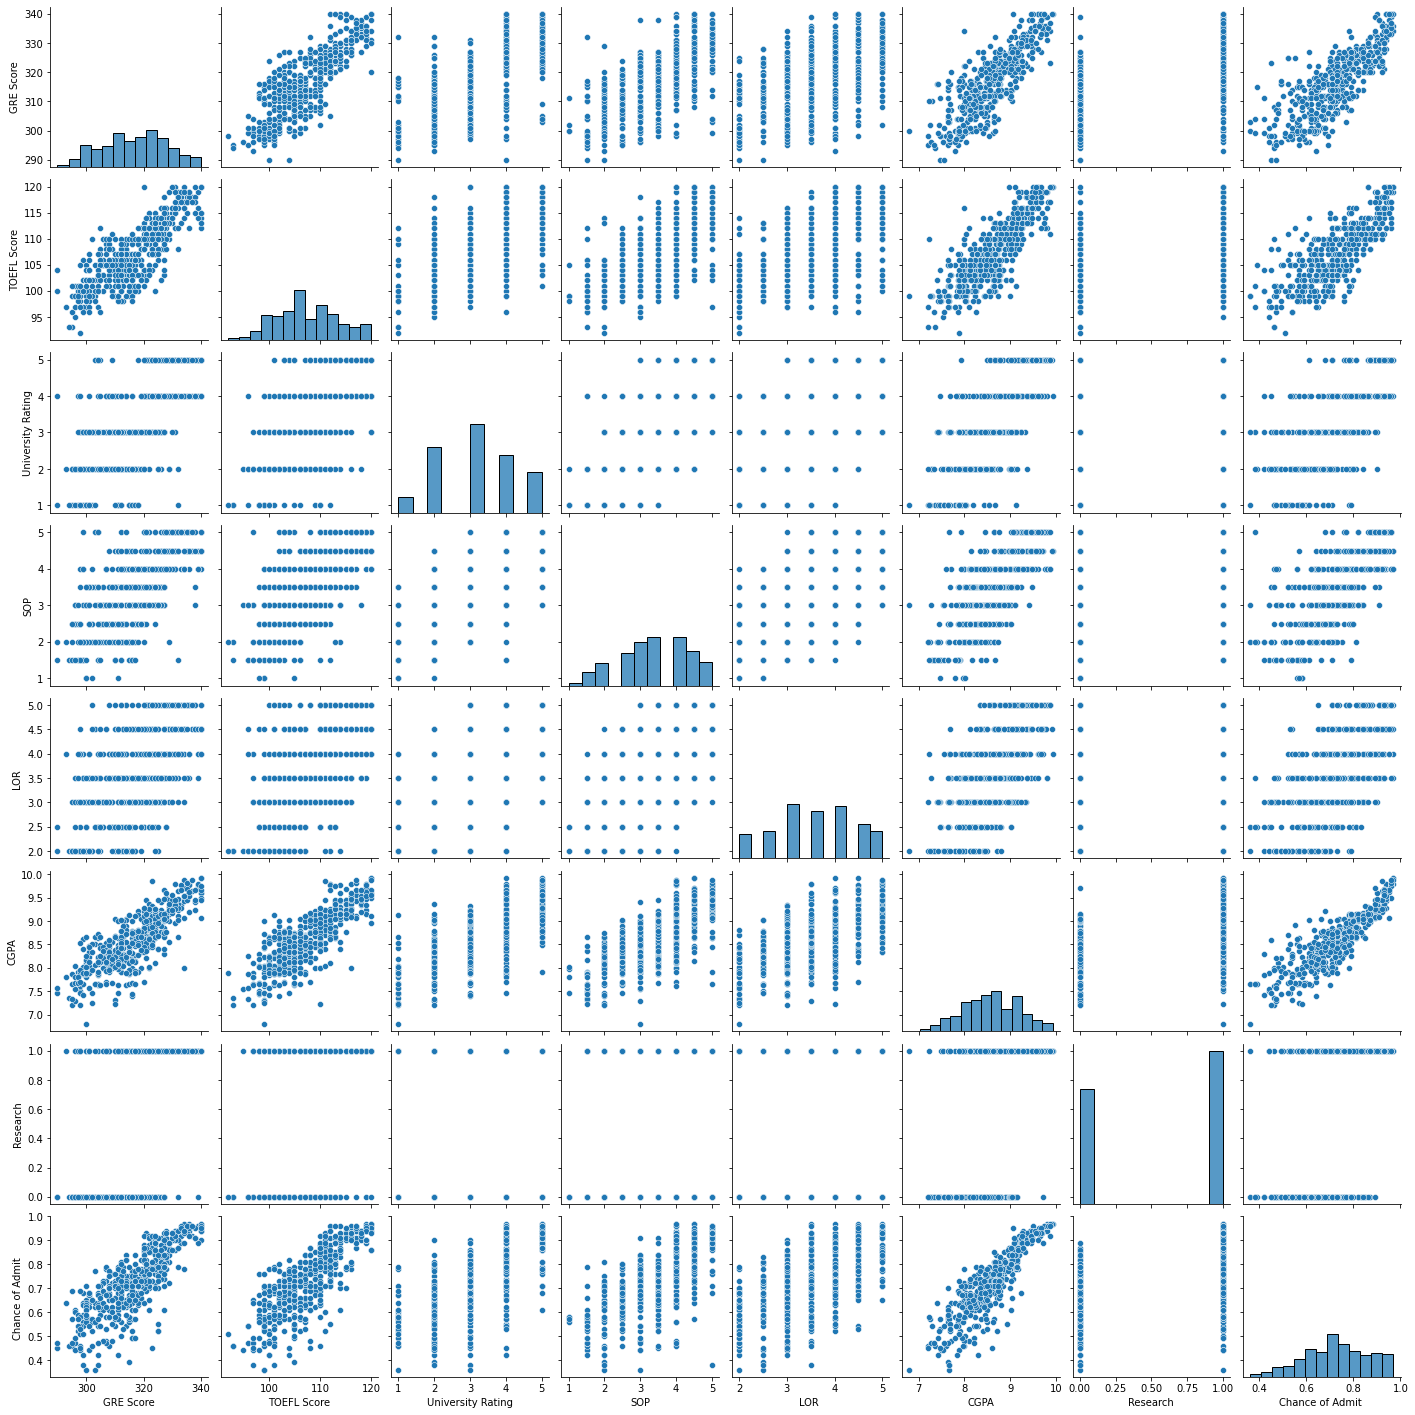

In [ ]:
sns.pairplot(work_df)

#### Univariate Analysis

Text(0.5, 1.0, 'Research Distribution')

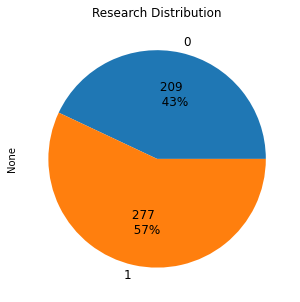

In [ ]:
def label_func(val):
  return f'{val/100 * len(work_df): .0f} \n {val: .0f}%'

plt.figure(figsize=(15, 5))
work_df.groupby(['Research']).size().plot(kind='pie', autopct=label_func, textprops={'fontsize': 12})
plt.title("Research Distribution")

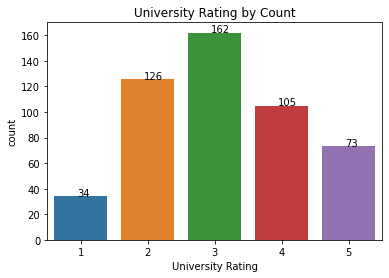

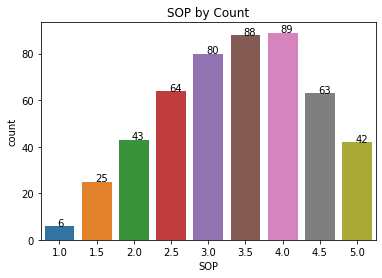

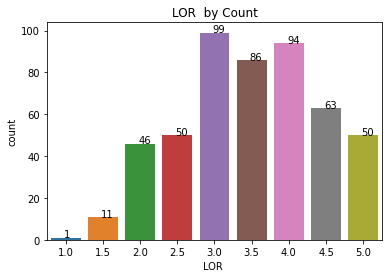

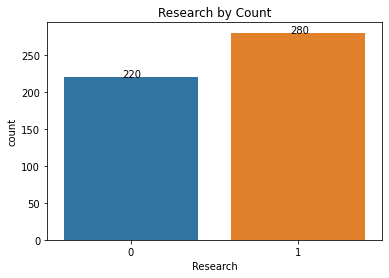

In [31]:
# Count plot of few attributes
for col in work_df.columns:
  if len(work_df[col].unique()) < 10:
    ax = sns.countplot(data=work_df, x=col)
    # ax = sns.distplot(work_df[col], bins = 10, color='BLUE')
    plt.title(f"{col} by Count")
    for p in ax.patches:
      ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
    plt.show()
    print()

##### **Observation:** 
*   *3/5 of Students have secured university ranks 2, 3 and 4*
*   *More than 50% of the Students have got research experience*

#### Bi-variate Analysis

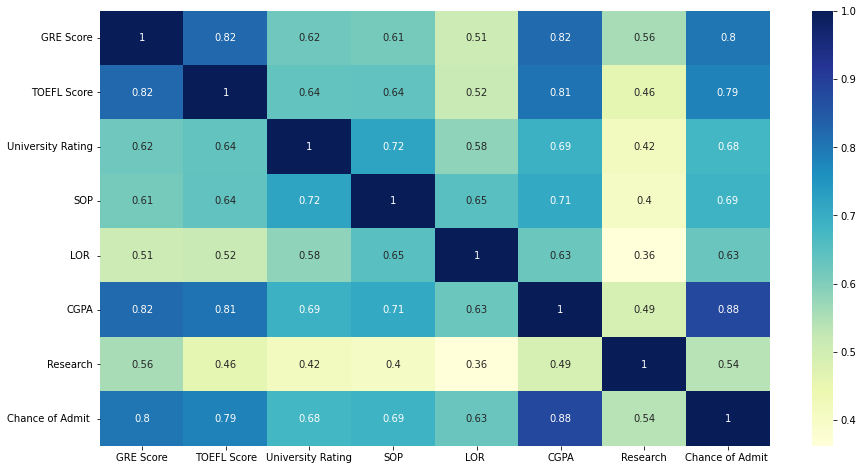

In [ ]:
# Check for Correlation
plt.figure(figsize=(15, 8))
sns.heatmap(work_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

##### **Observation:** 
*   *CGPA has the highest impact on Chances of Admission*
*   *GRE and TOEFL Scores also have significant impact on Chances of Admission*
*   *Interestingly though Research experience seem to have an impact on chances of getting admission, it is ranked after CGPA and GRE scores only.*



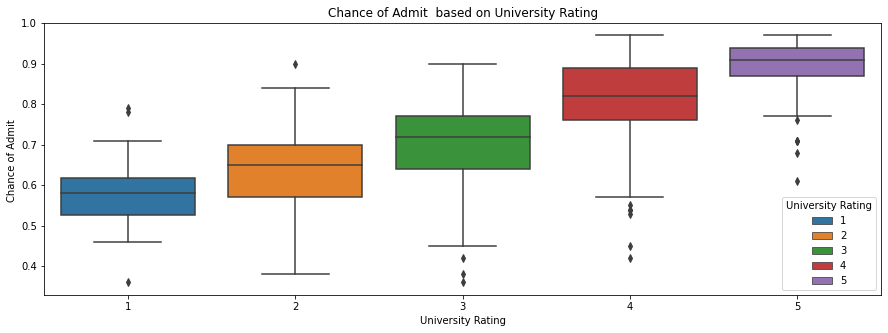

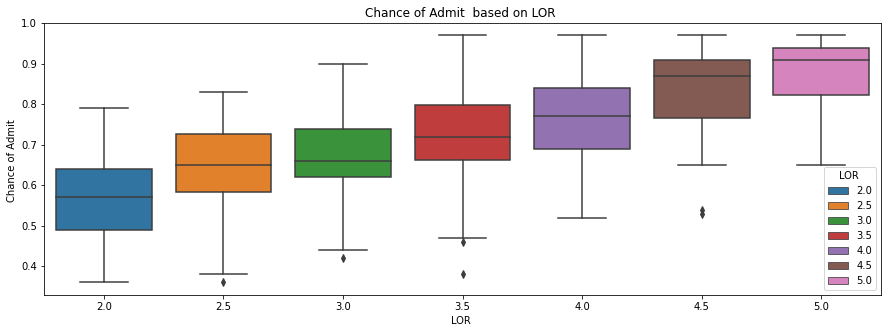

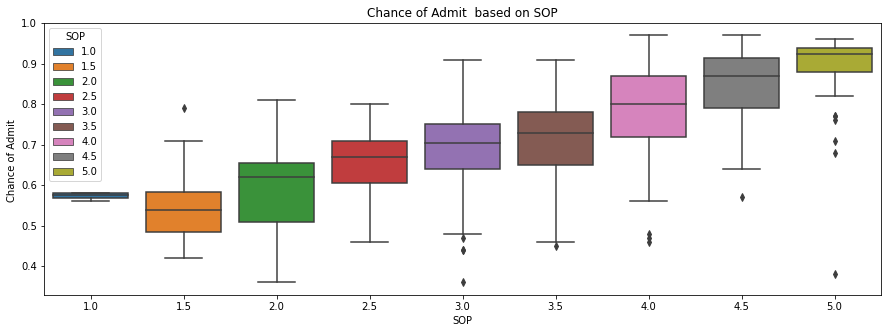

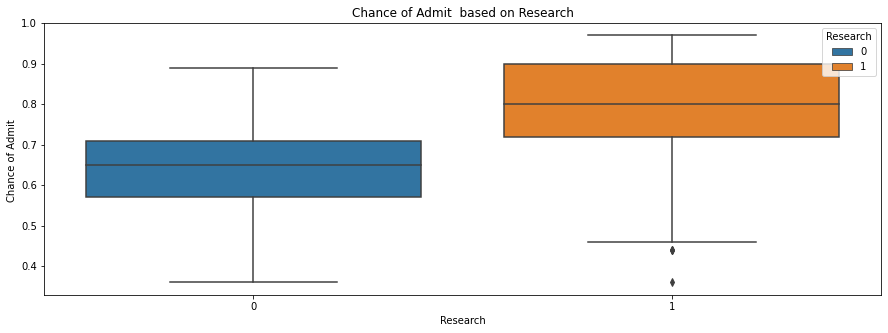

In [ ]:
# Impact of other features on 'Chances of Admission'
dep_variable = 'Chance of Admit '
column_list = ['University Rating', 'LOR ', 'SOP', 'Research']
for col in column_list:
  plt.figure(figsize=(15,5))
  sns.boxplot(x=col, hue=col, y=dep_variable, data=work_df, dodge=False)
  # sns.scatterplot(data=work_df, x=col, y=dep_variable, hue=col)
  plt.title(dep_variable + ' based on ' + col)
  plt.show()

##### **Observation:** *The above graphs indicate high on University Rating, SOP, LOR have an edge in chances of getting admission*

In [ ]:
work_df['cgpa_bins'] = pd.cut(x=work_df['CGPA'], bins=[0, 6, 7, 8, 9, 10], labels=['0-6', '6-7', '7-8', '8-9', '9-10'])
work_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,cgba_bins,cgpa_bins
0,337,118,4,4.5,4.5,9.65,1,0.92,9-10,9-10
1,324,107,4,4.0,4.5,8.87,1,0.76,8-9,8-9
2,316,104,3,3.0,3.5,8.00,1,0.72,7-8,7-8
3,322,110,3,3.5,2.5,8.67,1,0.80,8-9,8-9
4,314,103,2,2.0,3.0,8.21,0,0.65,8-9,8-9


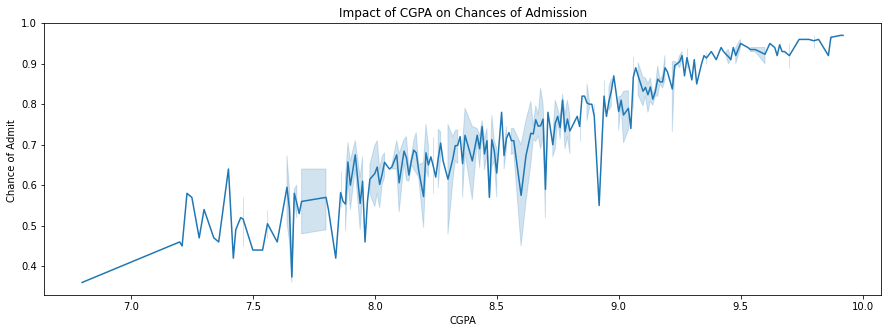

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='CGPA', y='Chance of Admit ', data=work_df)
# sns.scatterplot(data=work_df, x='CGPA', y='Chance of Admit ', hue='CGPA')
plt.title("Impact of CGPA on Chances of Admission")
plt.show()

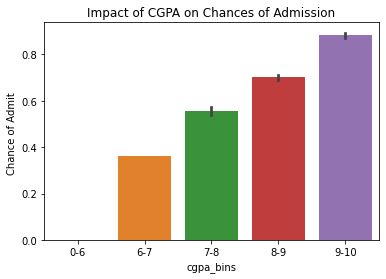

In [ ]:
sns.barplot(x='cgpa_bins', y='Chance of Admit ', data=work_df)
plt.title("Impact of CGPA on Chances of Admission")
plt.show()

In [ ]:
work_df['gre_bins'] = pd.cut(x=work_df['GRE Score'], bins=[0, 290, 300, 310, 320, 330, 340], labels=['0-290', '290-300', '300-310', '310-320', '320-330', '330-340'])
work_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,cgba_bins,cgpa_bins,gre_bins
0,337,118,4,4.5,4.5,9.65,1,0.92,9-10,9-10,330-340
1,324,107,4,4.0,4.5,8.87,1,0.76,8-9,8-9,320-330
2,316,104,3,3.0,3.5,8.00,1,0.72,7-8,7-8,310-320
3,322,110,3,3.5,2.5,8.67,1,0.80,8-9,8-9,320-330
4,314,103,2,2.0,3.0,8.21,0,0.65,8-9,8-9,310-320


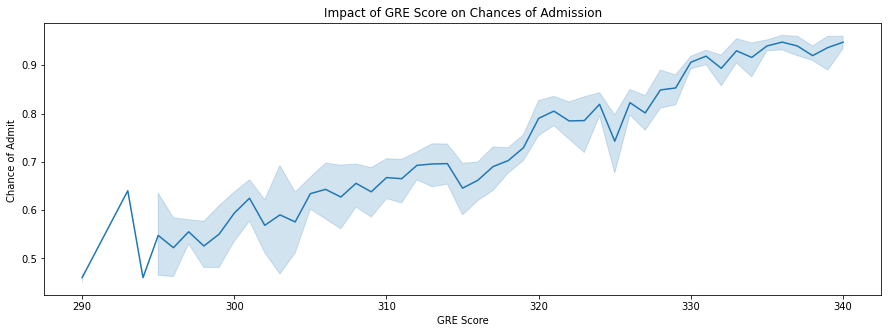

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='GRE Score', y='Chance of Admit ', data=work_df)
# sns.scatterplot(data=work_df, x='GRE Score', y='Chance of Admit ', hue='GRE Score')
plt.title("Impact of GRE Score on Chances of Admission")
plt.show()

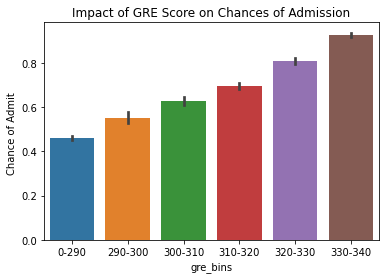

In [ ]:
sns.barplot(x='gre_bins', y='Chance of Admit ', data=work_df)
plt.title("Impact of GRE Score on Chances of Admission")
plt.show()

In [ ]:
work_df['toefl_bins'] = pd.cut(x=work_df['TOEFL Score'], bins=[0, 92, 100, 110, 120], labels=['0-92', '92-100', '100-110', '110-120'])
work_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,cgba_bins,cgpa_bins,gre_bins,toefl_bins
0,337,118,4,4.5,4.5,9.65,1,0.92,9-10,9-10,330-340,110-120
1,324,107,4,4.0,4.5,8.87,1,0.76,8-9,8-9,320-330,100-110
2,316,104,3,3.0,3.5,8.00,1,0.72,7-8,7-8,310-320,100-110
3,322,110,3,3.5,2.5,8.67,1,0.80,8-9,8-9,320-330,100-110
4,314,103,2,2.0,3.0,8.21,0,0.65,8-9,8-9,310-320,100-110


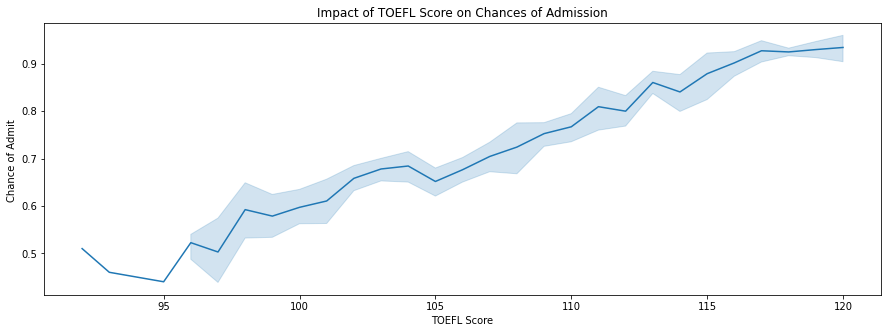

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='TOEFL Score', y='Chance of Admit ', data=work_df)
plt.title("Impact of TOEFL Score on Chances of Admission")
plt.show()

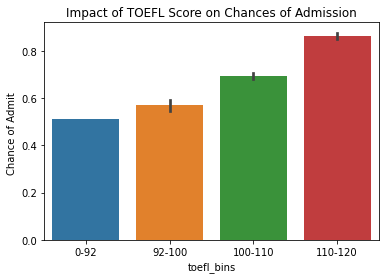

In [ ]:
sns.barplot(x='toefl_bins', y='Chance of Admit ', data=work_df)
plt.title("Impact of TOEFL Score on Chances of Admission")
plt.show()

##### **Observation:** *It is evident that higher the scores of CGPA, GRE and TOEFL, more the opportunity of getting admission*

## Model Building & Linear Regression

### Build & Fit the Model

In [ ]:
# Initialize the Model
model = LinearRegression()

In [33]:
X = data_df[data_df.columns.drop('Chance of Admit ')]
Y = data_df['Chance of Admit ']

In [ ]:
# Fit the Model
model.fit(X, Y)

LinearRegression()

In [ ]:
# Scale the Model
sc = StandardScaler()

In [ ]:
cols = X.columns
X[cols] = sc.fit_transform(X[cols])
model.fit(X, Y)

LinearRegression()

In [ ]:
model.intercept_

0.7217399999999997

In [ ]:
model.coef_

array([0.0209711 , 0.01687836, 0.00678723, 0.0015703 , 0.01558631,
       0.07152916, 0.01206592])

In [ ]:
model.score(X, Y)

0.8219007395178417

In [ ]:
# R-Square Value
print("Adjusted R-Square Value is: ", 1-(1-model.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

Adjusted R-Square Value is:  0.8193668069500062


In [ ]:
# To add intercept, add constant to Statsmodels
X_sm = sm.add_constant(X)
sm_model = sm.OLS(Y, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sat, 14 Jan 2023   Prob (F-statistic):          8.21e-180
Time:                        17:29:25   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7217      0.00

##### Since P>|t| for SOP is > 72%, let's drop it from the Model

In [34]:
X2 = X.drop('SOP', axis=1)
X2.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,337,118,4,4.5,9.65,1
1,324,107,4,4.5,8.87,1
2,316,104,3,3.5,8.00,1
3,322,110,3,2.5,8.67,1
4,314,103,2,3.0,8.21,0


In [35]:
X2_sm = sm.add_constant(X2)
sm_model = sm.OLS(Y, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          4.29e-181
Time:                        06:56:56   Log-Likelihood:                 701.32
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2800      0.10

### Multi-collinearity check

In [ ]:
# Calculate VIF
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns

vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
5,CGPA,4.78
0,GRE Score,4.46
1,TOEFL Score,3.90
3,SOP,2.84
2,University Rating,2.62
4,LOR,2.03
6,Research,1.49


##### **Observation:** *No multi-collinearity observed in the dataset*

### Train the Model

In [38]:
# Split train & test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [ ]:
# Shape of Train & Test data
print("Shape of Training Set X: ", x_train.shape)
print("Shape of Training Set Y: ", y_train.shape)
print("Shape of Test Set X: ", x_test.shape)
print("Shape of Test Set Y: ", y_test.shape)

Shape of Training Set X:  (450, 7)
Shape of Training Set Y:  (450,)
Shape of Test Set X:  (50, 7)
Shape of Test Set Y:  (50,)


In [39]:
model = LinearRegression()
model.fit(x_test, y_test)

LinearRegression()

In [40]:
model.coef_

array([-0.00022057, -0.00110717, -0.00192457,  0.00982144,  0.01727098,
        0.1688538 ,  0.04546047])

In [43]:
pd.DataFrame(list(zip(model.coef_, X.columns)), columns={'Model Coefficient', 'Feature'})

,Model Coefficient,Feature
0,-0.000221,GRE Score
1,-0.001107,TOEFL Score
2,-0.001925,University Rating
3,0.009821,SOP
4,0.017271,LOR
5,0.168854,CGPA
6,0.045460,Research


In [44]:
model.intercept_

-0.6614277433286037

In [45]:
model.score(x_train, y_train)

0.7882398753486778

In [46]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=0.1, random_state=1)

In [47]:
print("Shape of Training Set X: ", x2_train.shape)
print("Shape of Training Set Y: ", y2_train.shape)
print("Shape of Test Set X: ", x2_test.shape)
print("Shape of Test Set Y: ", y2_test.shape)

Shape of Training Set X:  (450, 6)
Shape of Training Set Y:  (450,)
Shape of Test Set X:  (50, 6)
Shape of Test Set Y:  (50,)


In [49]:
model2 = LinearRegression()
model2.fit(x2_test, y2_test)

LinearRegression()

In [50]:
pd.DataFrame(list(zip(model2.coef_, X2.columns)), columns={'Model Coefficient', 'Feature'})

,Model Coefficient,Feature
0,-0.000170,GRE Score
1,-0.000710,TOEFL Score
2,-0.001545,University Rating
3,0.019899,LOR
4,0.171906,CGPA
5,0.047858,Research


In [51]:
model2.score(x2_train, y2_train)

0.7899860873559093

In [52]:
y2_pred = model2.predict(x2_test)

In [53]:
print("Mean Absolute Error    : ", mean_absolute_error(y2_test, y2_pred))
print("Mean Squared Error     : ", mean_squared_error(y2_test, y2_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test, y2_pred)))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y2_test, y2_pred))

Mean Absolute Error    :  0.04556136222018683
Mean Squared Error     :  0.0038500459295453264
Root Mean Squared Error:  0.06204873833967397
Mean Absolute Percentage Error:  0.07172231234401452


In [54]:
preds = model2.predict(x2_train)
errors = preds - y2_train

Text(0.5, 1.0, 'Train Data Distribution')

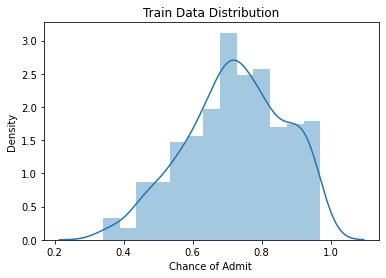

In [57]:
sns.distplot(y2_train)
plt.title("Train Data Distribution")

Text(0.5, 0, 'Prediction Level')

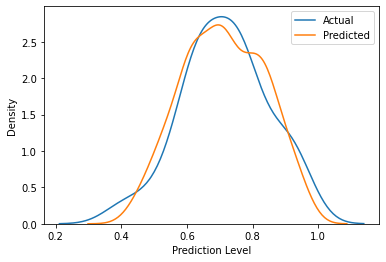

In [59]:
sns.distplot(y2_test, hist=False, label='Actual')
sns.distplot(preds, hist=False, label='Predicted')
plt.legend(loc='upper right')
plt.xlabel('Prediction Level')

#### Test for Normality of residuals

Text(0.5, 1.0, 'Histo of Residuals')

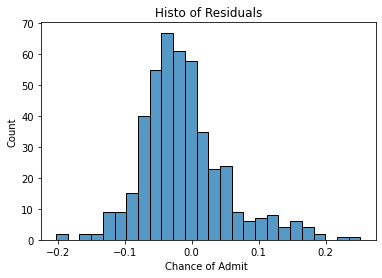

In [60]:
sns.histplot(errors)
plt.title("Histo of Residuals")

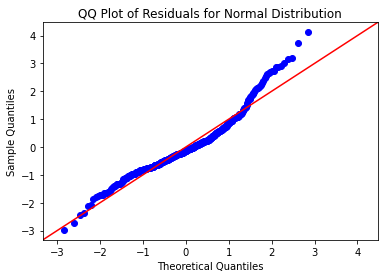

In [62]:
sm.qqplot(errors, line='45', fit=True, dist=stats.norm)
plt.title("QQ Plot of Residuals for Normal Distribution")
plt.show()

In [ ]:
#### Homoscedasticity Test

Text(0.5, 1.0, 'Admission Prediction Vs Residuals')

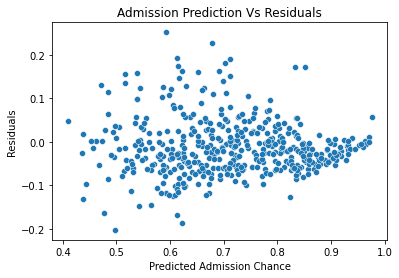

In [63]:
sns.scatterplot(preds, errors)
plt.xlabel("Predicted Admission Chance")
plt.ylabel("Residuals")
plt.title("Admission Prediction Vs Residuals")

#### Test of Lienarity of features

In [64]:
X2.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

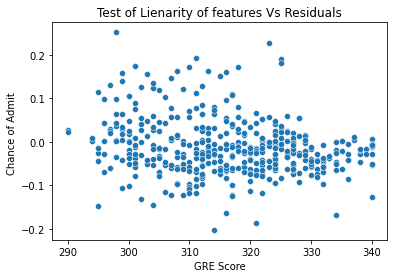

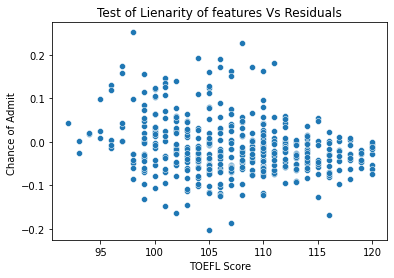

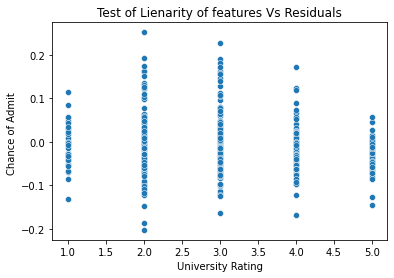

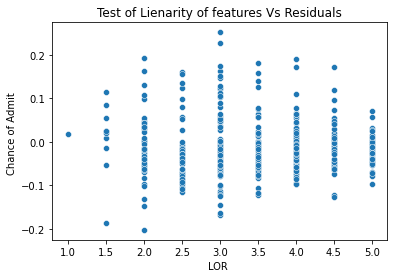

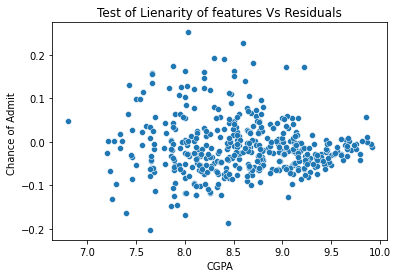

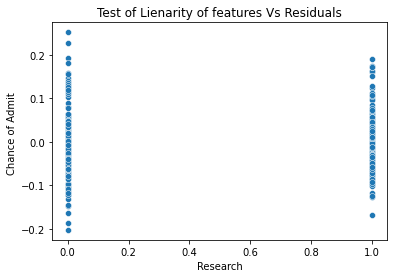

In [65]:
for col in X2.columns:
  plt.title("Test of Lienarity of features Vs Residuals")
  sns.scatterplot(X2[col], errors)
  plt.show()

#### Feature Importance

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
classifier = RandomForestRegressor()
classifier.fit(X2, Y)
features = X2.columns
importance_list = pd.DataFrame()
importance_list['Features'] = X2.columns
importance_list['Importance'] = classifier.feature_importances_
importance_list = importance_list.sort_values(by=['Importance'], ascending=True)

In [70]:
importance_list

,Features,Importance
5,Research,0.011603
2,University Rating,0.018650
3,LOR,0.028292
1,TOEFL Score,0.042086
0,GRE Score,0.080769
4,CGPA,0.818600


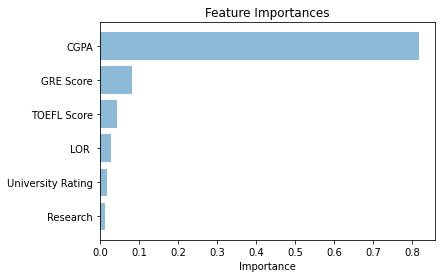

In [73]:
from scipy.stats.distributions import alpha
plt.barh([1, 2, 3, 4, 5, 6], importance_list['Importance'], align='center', alpha=0.5)
plt.yticks([1, 2, 3, 4, 5, 6], importance_list['Features'])
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

## Insights & Recommendations


*   The CGPA, GRE and TOEFL scores have a clear impact on chances of getting admission
*   Higher the score on CGPA, GRE and TOEFL, more the chances of getting admission
*   Having research experience also has a positive impact on getting admission
*   Jamboree can help the Students in preparing them well for their university exams, GRE and TOEFL, so that the Students can score more on these and increase their chances of getting admission.

